# UBER DATA

## Importing Modules

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
%matplotlib inline

## Importing Data

In [3]:
uber = pd.read_csv('uber-raw-data-janjune-15_sample.csv')
uber.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140


In [5]:
uber.shape

(100000, 4)

## Data Cleaning

1. Duplicates

In [10]:
uber.duplicated().sum()

np.int64(54)

In [11]:
uber.drop_duplicates(inplace= True)

In [12]:
uber.duplicated().sum()

np.int64(0)

In [14]:
uber.shape

(99946, 4)

2. Handling Missing Values

In [8]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Dispatching_base_num  100000 non-null  object
 1   Pickup_date           100000 non-null  object
 2   Affiliated_base_num   98882 non-null   object
 3   locationID            100000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.1+ MB


In [6]:
uber.isna().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1118
locationID                 0
dtype: int64

In [7]:
[feature for feature in uber.columns if uber[feature].isnull().sum() > 0]

['Affiliated_base_num']

Filling the null values with the mode of the column as they could belong to the most common base and mathematically it maintains consistency.....

In [15]:
uber['Affiliated_base_num'].fillna(uber['Affiliated_base_num'].mode()[0], inplace= True)

In [16]:
uber.isna().sum()

Dispatching_base_num    0
Pickup_date             0
Affiliated_base_num     0
locationID              0
dtype: int64

3. Checking the Datatypes

In [18]:
uber.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140


In [17]:
uber.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [19]:
uber['Pickup_date'] = pd.to_datetime(uber['Pickup_date'])

In [20]:
uber.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

## Analysis

In [38]:
Preferred_Color = '#89332a'

Q1. Which month have max Uber Pickups?

In [22]:
uber['month'] = uber['Pickup_date'].dt.month_name()

In [46]:
uber_max_month = uber.groupby('month').size().reset_index(name= 'Pickup_Count').sort_values('Pickup_Count')
uber_max_month

,month,Pickup_Count
2,January,13819
1,February,15896
4,March,15969
0,April,15982
5,May,18660
3,June,19620


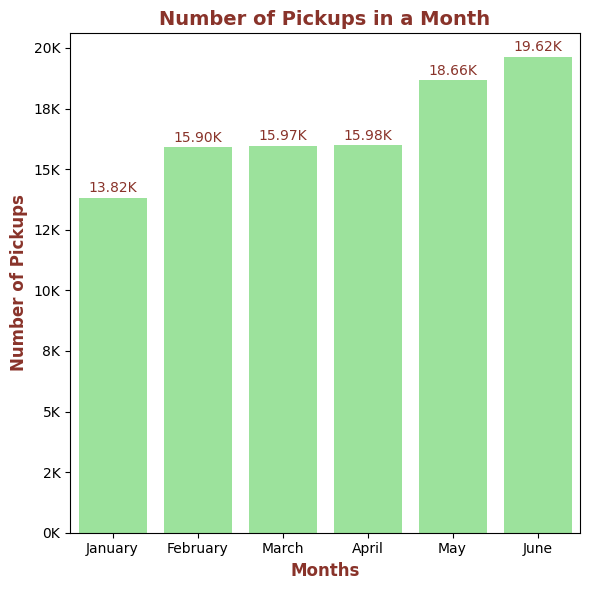

In [48]:
plt.figure(figsize=(6,6))
myplot = sns.barplot(data= uber_max_month, x= 'month', y= 'Pickup_Count',
            color= "lightgreen")

for bar in myplot.containers:
    myplot.bar_label(bar,
                     labels= [f'{(v/1000):0.2f}K' for v in bar.datavalues],
                     padding= 2,
                     color = Preferred_Color)
    
myplot.yaxis.set_major_formatter(tick.FuncFormatter(lambda x, _: f'{x/1000:0.0f}K'))
plt.title("Number of Pickups in a Month",
          fontdict= {'fontweight' : 'bold',
                     'fontsize' : 14,
                     'color': Preferred_Color})
plt.xlabel("Months",
          fontdict= {'fontweight' : 'bold',
                     'fontsize' : 12,
                     'color': Preferred_Color})
plt.ylabel("Number of Pickups",
          fontdict= {'fontweight' : 'bold',
                     'fontsize' : 12,
                     'color': Preferred_Color})

plt.tight_layout()
plt.show()

Insights:
    Clearly June has the maximum number of Pickups